In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading Dataset
data = pd.read_csv('retail_sales_dataset.csv')

In [4]:
# Display the first few rows of the dataset
display(Markdown("**First few rows of the dataset:**"))
data.head()

**First few rows of the dataset:**

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.shape

(1000, 9)

In [6]:
# Summary statistics
display(Markdown("**Summary statistics:**"))
data.describe()

**Summary statistics:**

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
# Checking for the NULL value
display(Markdown("**Evaluating NULL Values:**"))
null_summary = data.isna().sum()
print(null_summary)

**Evaluating NULL Values:**

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [9]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
# Fill NaN values in numeric columns with the median
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill NaN values in non-numeric columns with a specific value (e.g., empty string)
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna('')

In [11]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
# Extract additional features
data['Month'] = data['Date'].dt.to_period('M')
data['Year'] = data['Date'].dt.year


In [18]:
monthly_sales = data.groupby('Month')['Total Amount'].sum().reset_index()

In [61]:
# Print key insights
display(Markdown("**Key Insight**"))
print("Total Sales:", data['Total Amount'].sum())
print("Average Quantity Sold:", data['Quantity'].mean())
print(data['Product Category'].value_counts())

**Key Insight**

Total Sales: 456000
Average Quantity Sold: 2.514
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


# Visualizations

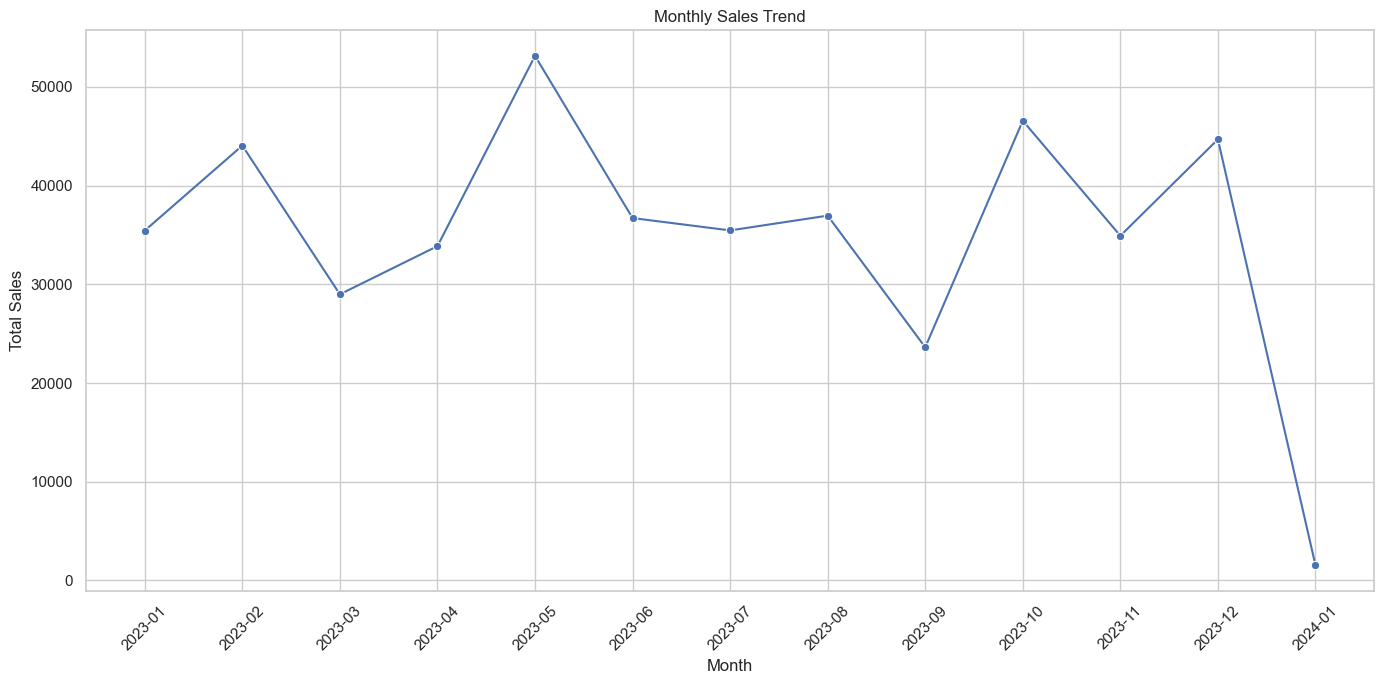

In [20]:
# Ensure 'Month' is a string format
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


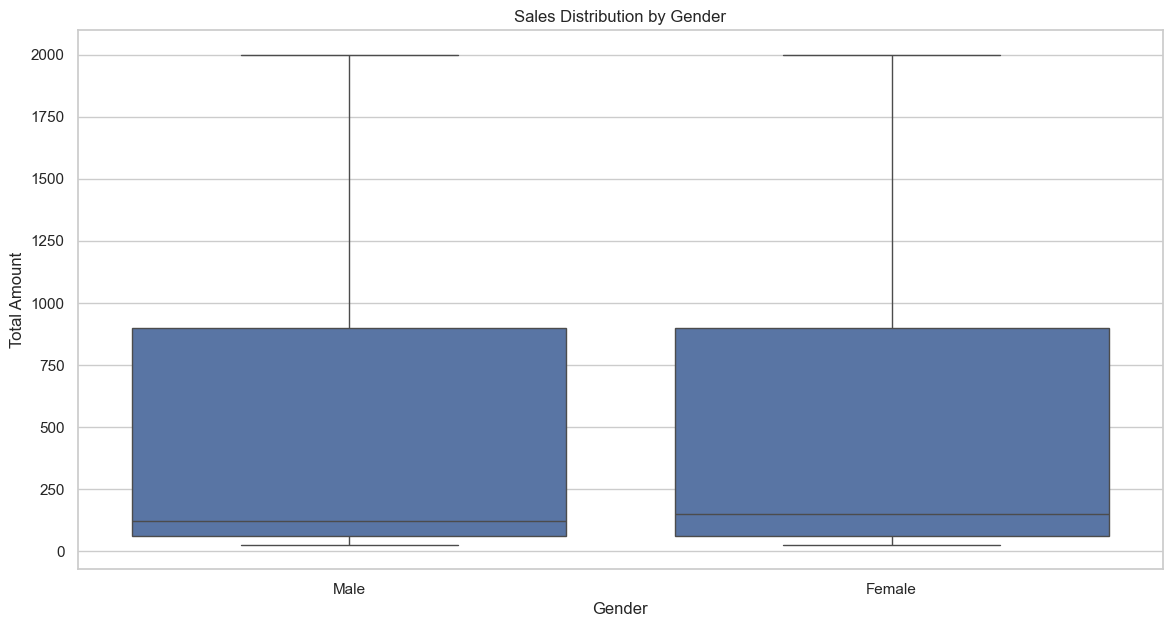

In [22]:
# Sales Distribution by Gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Gender', y='Total Amount')
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

C:\Users\prakh\AppData\Local\Temp\ipykernel_11480\4121521097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')


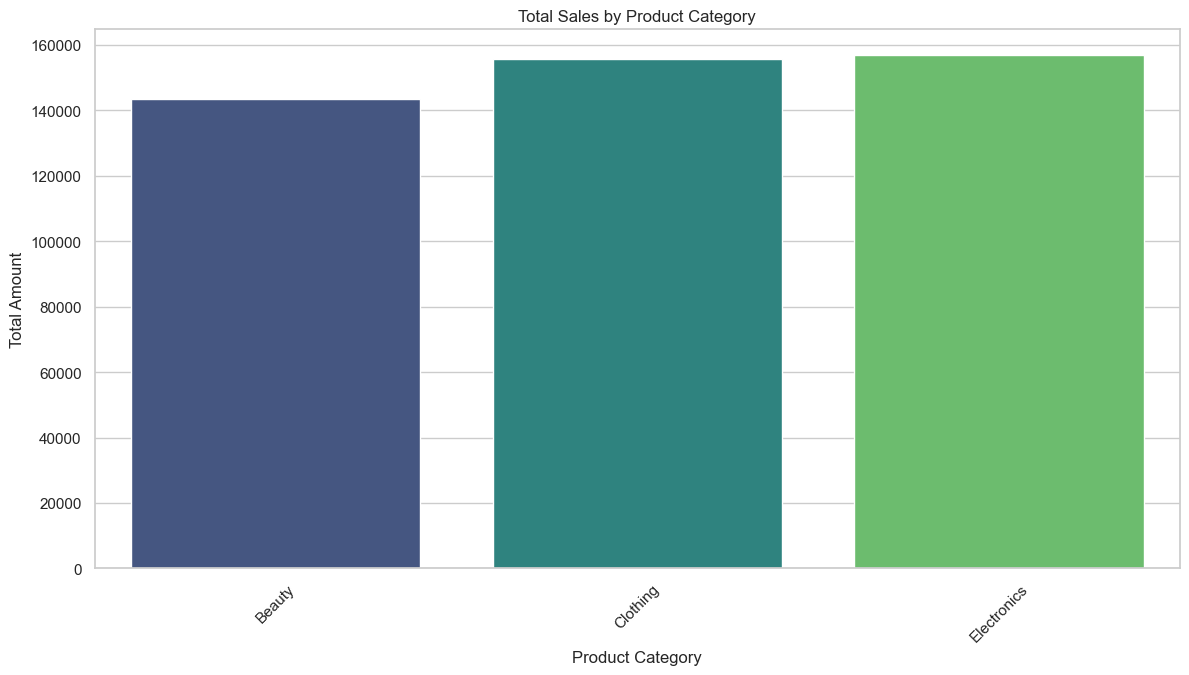

In [24]:
# 5.3: Sales by Product Category
plt.figure(figsize=(14, 7))
category_sales = data.groupby('Product Category')['Total Amount'].sum().reset_index()
sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


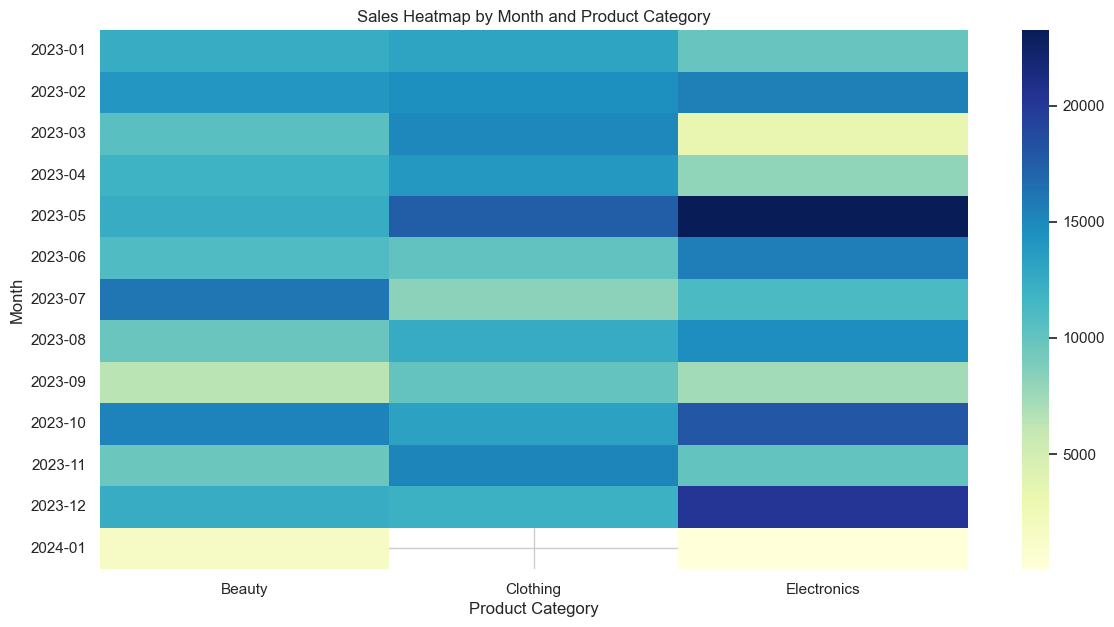

In [34]:
# Heatmap of Sales by Month and Product Category
sales = data.pivot_table(values='Total Amount', index='Month', columns='Product Category', aggfunc='sum')
plt.figure(figsize=(14, 7))
sns.heatmap(sales, cmap='YlGnBu')
plt.title('Sales Heatmap by Month and Product Category')
plt.ylabel('Month')
plt.xlabel('Product Category')
plt.show()

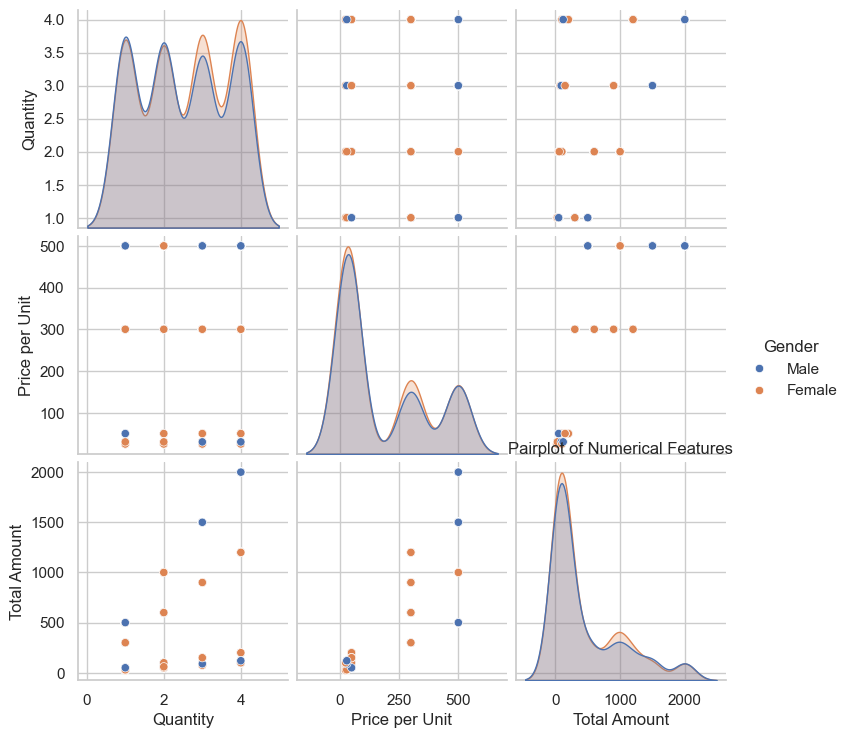

In [28]:
# Pairplot of Numerical Features
sns.pairplot(data, vars=['Quantity', 'Price per Unit', 'Total Amount'], hue='Gender')
plt.title('Pairplot of Numerical Features')
plt.show()


In [66]:
# Create new column
data['Sales_per_Transaction'] = data['Total Amount'] / data['Quantity']

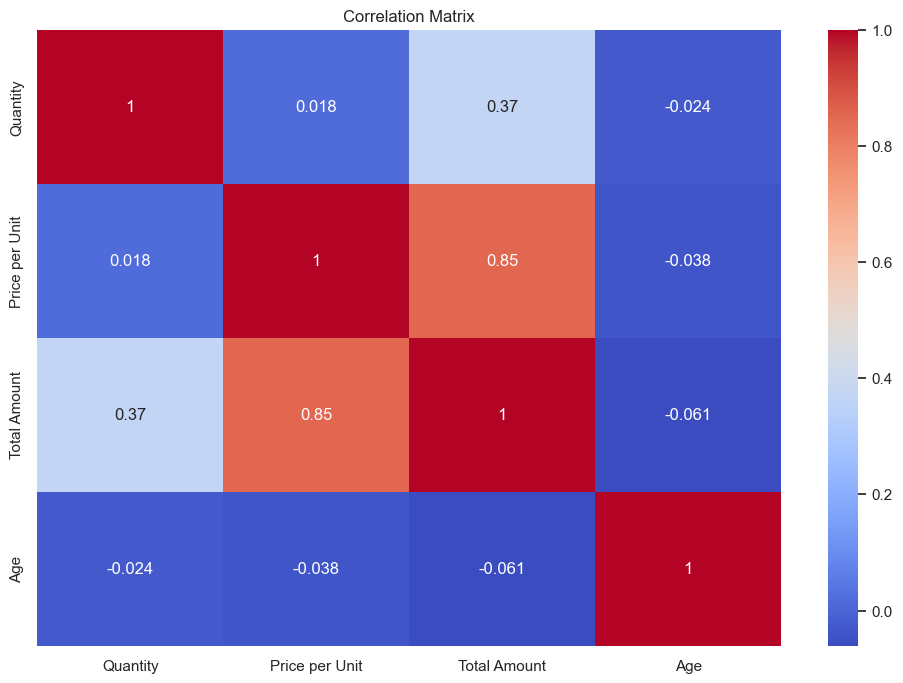

In [38]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation = data[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Sales_per_Transaction,Discount_Rate
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,2023,50.0,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,2023,500.0,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,2023,30.0,0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,2023,500.0,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,2023,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05,2023,50.0,0
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11,2023,30.0,0
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10,2023,25.0,0
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12,2023,50.0,0


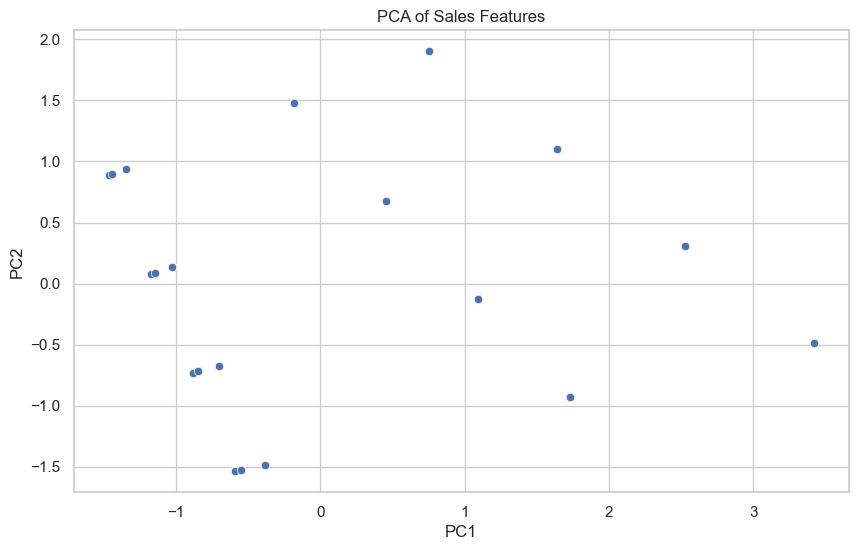

In [42]:
# PCA for Dimensionality Reduction
features = data[['Quantity', 'Price per Unit', 'Total Amount']]
scaled_features = (features - features.mean()) / features.std()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Sales Features')
plt.show()

In [56]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(features)

C:\Users\prakh\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


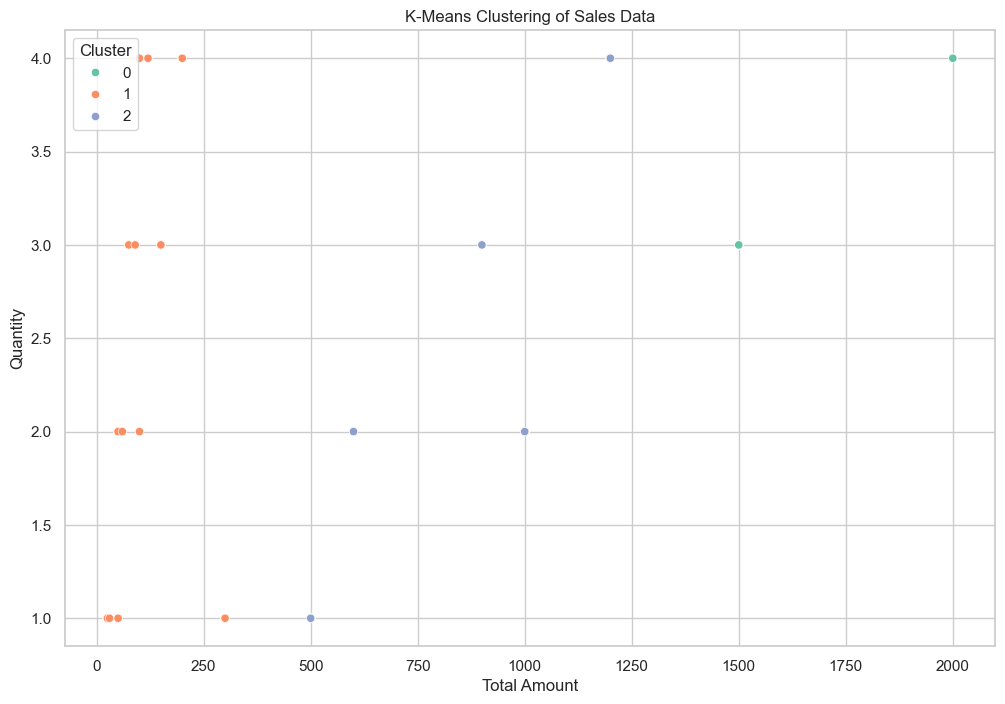

In [58]:
# Visualizing Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Amount', y='Quantity', hue='Cluster', data=data, palette='Set2')
plt.title('K-Means Clustering of Sales Data')
plt.show()

# Finish